#### Question: Given a plot of a story find out which genre it belongs
#### categorise a comment as spoiler or not spoiler

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import string
import texthero as hero
from wordcloud.wordcloud import WordCloud

In [2]:
movieDetails = pd.read_json('./IMDB_movie_details.json', lines=True)
# print(movieDetails["plot_synopsis"][0])
movieDetails.head()

movie_id                                       plot_summary  duration  \
0  tt0105112  Former CIA analyst, Jack Ryan is in England wi...  1h 57min   
1  tt1204975  Billy (Michael Douglas), Paddy (Robert De Niro...  1h 45min   
2  tt0243655  The setting is Camp Firewood, the year 1981. I...  1h 37min   
3  tt0040897  Fred C. Dobbs and Bob Curtin, both down on the...   2h 6min   
4  tt0126886  Tracy Flick is running unopposed for this year...  1h 43min   

                         genre  rating release_date  \
0           [Action, Thriller]     6.9   1992-06-05   
1                     [Comedy]     6.6   2013-11-01   
2            [Comedy, Romance]     6.7   2002-04-11   
3  [Adventure, Drama, Western]     8.3   1948-01-24   
4     [Comedy, Drama, Romance]     7.3   1999-05-07   

                                       plot_synopsis  
0  Jack Ryan (Ford) is on a "working vacation" in...  
1  Four boys around the age of 10 are friends in ...  
2                                                     
3  Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...  
4  Jim McAllister (Matthew Broderick) is a much-a...

In [3]:
# movieReviews = pd.read_json('./IMDB_reviews.json', lines=True)
# movieReviews.head()

In [4]:
print("Movie shape: ",movieDetails.shape)
print("Null values: ",movieDetails.isnull().values.any())

# movieDetails[movieDetails["plot_synopsis"].notna()]
movieDetails["plot_synopsis"].notna().unique()
print(type(movieDetails["plot_synopsis"][2]))

Movie shape:  (1572, 7)
Null values:  False
<class 'str'>


# visualizing the dataset

In [5]:
import gensim

# %%time
# Build the bigram and trigram models
bigram = gensim.models.Phrases(movieDetails["plot_synopsis"], min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

print("bigram: ",bigram)
# print("trigram: ",trigram)



# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

print(bigram_mod)

bigram:  Phrases<4135 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


### visual 1 -> counts per rating

Text(0.5, 1.0, 'Counts per rating')

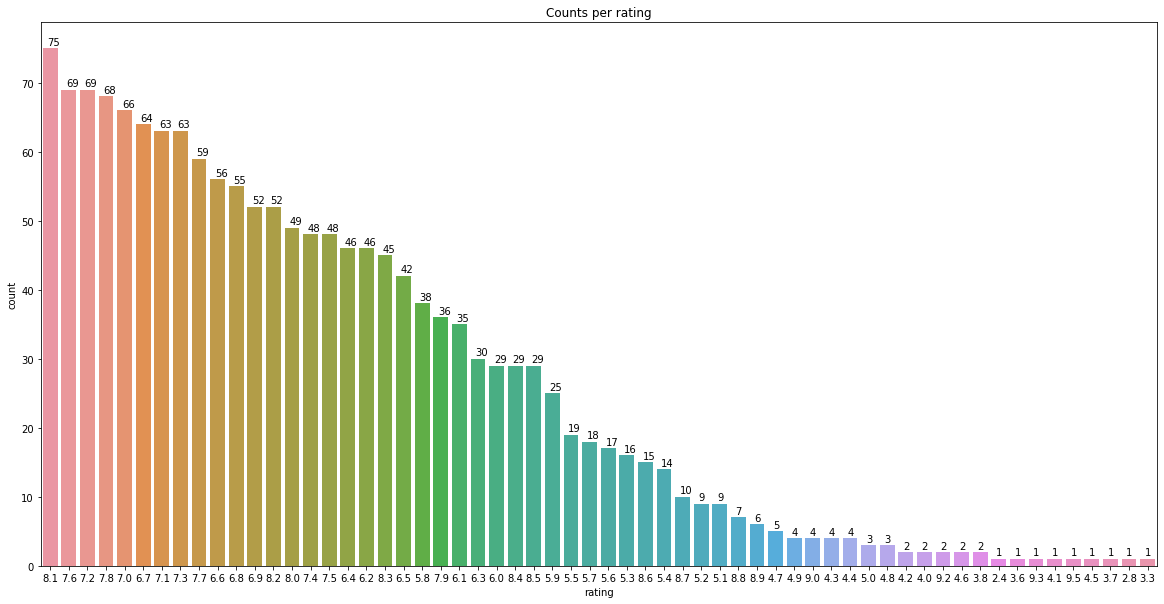

In [6]:
plt.figure(figsize=(20,10))

ax = sns.countplot(x=movieDetails["rating"],  data=movieDetails, order = movieDetails["rating"].value_counts().index )
for p, label in zip(ax.patches, movieDetails["rating"].value_counts()):
#     print(p)
#     print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))
ax.set_title('Counts per rating')

In [7]:
#below shows us each movie is only mentioned once
movieDetails.groupby("movie_id").count().describe()


plot_summary  duration   genre  rating  release_date  plot_synopsis
count        1572.0    1572.0  1572.0  1572.0        1572.0         1572.0
mean            1.0       1.0     1.0     1.0           1.0            1.0
std             0.0       0.0     0.0     0.0           0.0            0.0
min             1.0       1.0     1.0     1.0           1.0            1.0
25%             1.0       1.0     1.0     1.0           1.0            1.0
50%             1.0       1.0     1.0     1.0           1.0            1.0
75%             1.0       1.0     1.0     1.0           1.0            1.0
max             1.0       1.0     1.0     1.0           1.0            1.0

[Action, Adventure, Sci-Fi]    68
[Comedy, Drama, Romance]       58
[Drama, Romance]               50
[Comedy]                       49
[Drama]                        49
                               ..
[Comedy, Drama, Sport]          1
[Adventure, Sci-Fi]             1
[Drama, Fantasy, Mystery]       1
[Biography, Drama, Family]      1
[Action, Comedy, Thriller]      1
Name: genre, Length: 237, dtype: int64


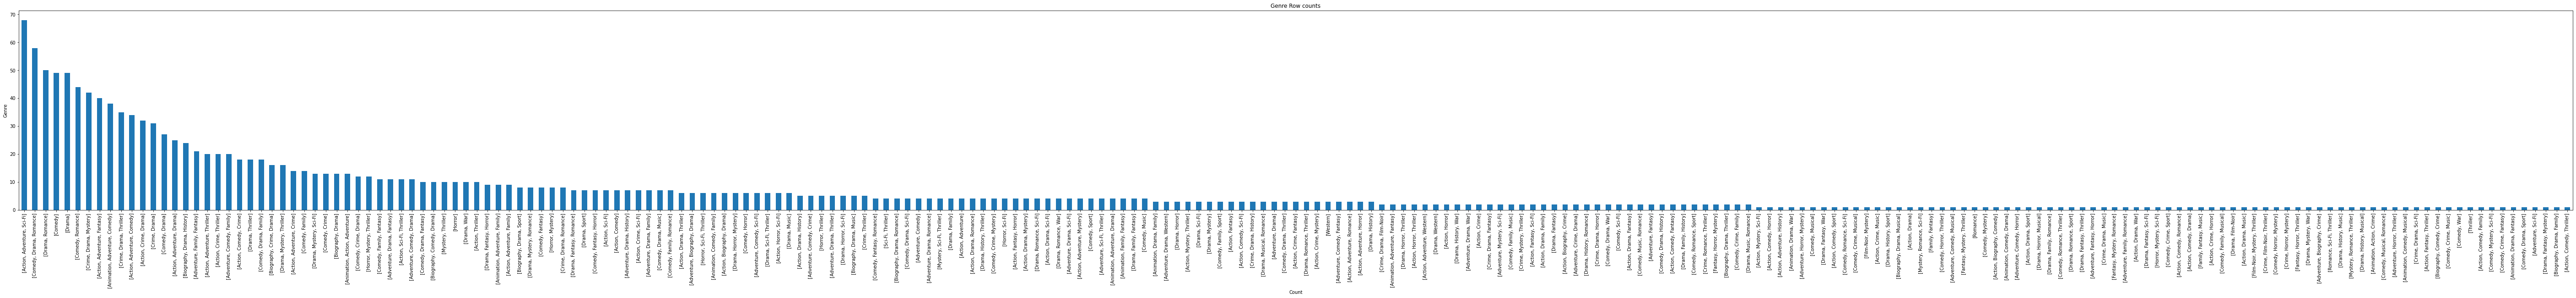

In [53]:
print(movieDetails["genre"].value_counts())
movieDetails["genre"].value_counts().plot(kind="bar",figsize=(100,8))
plt.title("Genre Row counts")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [8]:
genres=[]
for i in movieDetails["genre"]:
    for j in i:
        genres.append(j)

In [9]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [10]:
def make_bigrams(texts): #from course notes
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):#from course notes
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    
#lemmatization and tokenization
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

#for removing punctuations
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

### cleaning the plot_synopsis column

In [11]:
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(clean_text)
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(remove_Stopwords)
movieDetails["plot_synopsis"] = movieDetails["plot_synopsis"].apply(lemmatize_text)
movieDetails["plot_synopsis"]

0       jack ryan ford working vacation london family ...
1       four boy around age 10 friend brooklyn 50 nick...
2                                                        
3       fred dobbs humphrey bogart bob curtin tim holt...
4       jim mcallister matthew broderick muchadmired h...
                              ...                        
1567    year 1998 evan treborn ashton kutcher suffered...
1568    brandon michael fassbender successful handsome...
1569    film alternate three different period time inv...
1570                                                     
1571                                                     
Name: plot_synopsis, Length: 1572, dtype: object

### cleaning the plot_summary column

In [12]:
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(clean_text)
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(remove_Stopwords)
movieDetails["plot_summary"] = movieDetails["plot_summary"].apply(lemmatize_text)
movieDetails["plot_summary"]

0       former cia analyst jack ryan england family va...
1       billy michael douglas paddy robert de niro arc...
2       setting camp firewood year 1981 last day every...
3       fred c dobbs bob curtin luck tampico mexico 19...
4       tracy flick running unopposed year high school...
                              ...                        
1567    evan treborn grows small town single working m...
1568    brandon 30something man living new york unable...
1569    evacuation allied soldier british empire franc...
1570    beautiful 24yearold diana bruni who happily ma...
1571    marriage david burgess senior executive beauti...
Name: plot_summary, Length: 1572, dtype: object

count    1572.000000
mean      781.980916
std       800.601270
min         0.000000
25%       273.750000
50%       590.500000
75%      1036.000000
max      6113.000000
Name: num_words, dtype: float64


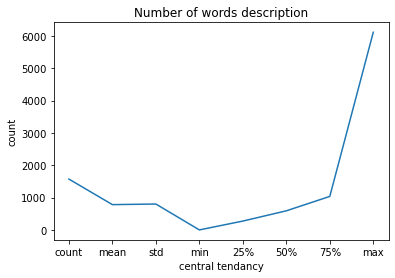

In [13]:
movieDetails['num_words'] = movieDetails['plot_synopsis'].apply(lambda x:len(str(x).split())) 

desc = movieDetails['num_words'].describe()
print(desc)
plt.plot(desc)
plt.title("Number of words description")
plt.xlabel("central tendancy")
plt.ylabel("count")
plt.show()


In [14]:
print(movieDetails['rating'].median())
median = movieDetails['rating'].median()

7.1


In [15]:
lower_ratings = movieDetails[movieDetails['rating'] < median]
higher_ratings = movieDetails[movieDetails['rating'] > median]
lower_ratings

movie_id                                       plot_summary  duration  \
0      tt0105112  former cia analyst jack ryan england family va...  1h 57min   
1      tt1204975  billy michael douglas paddy robert de niro arc...  1h 45min   
2      tt0243655  setting camp firewood year 1981 last day every...  1h 37min   
5      tt0286716  bruce banner brilliant scientist cloudy past f...  2h 18min   
7      tt0243155  bridget jones average woman struggling age wei...  1h 37min   
...          ...                                                ...       ...   
1557   tt0119738  woman promise made year earlier supposed marry...  1h 45min   
1558   tt1502712  fantastic four contemporary reimagining marvel...  1h 40min   
1562   tt0120891  jim west gunsablazing former civil war hero ar...  1h 46min   
1570  tt0104014/  beautiful 24yearold diana bruni who happily ma...  1h 33min   
1571  tt0114142/  marriage david burgess senior executive beauti...  1h 32min   

                            genre  rating release_date  \
0              [Action, Thriller]     6.9   1992-06-05   
1                        [Comedy]     6.6   2013-11-01   
2               [Comedy, Romance]     6.7   2002-04-11   
5                [Action, Sci-Fi]     5.7   2003-06-20   
7        [Comedy, Drama, Romance]     6.7   2001-04-13   
...                           ...     ...          ...   
1557     [Comedy, Drama, Romance]     6.3   1997-06-20   
1558  [Action, Adventure, Sci-Fi]     4.3   2015-08-07   
1562     [Action, Comedy, Sci-Fi]     4.8   1999-06-30   
1570              [Comedy, Drama]     5.3   1992-02-21   
1571            [Drama, Thriller]     4.0   1999-01-29   

                                          plot_synopsis  num_words  
0     jack ryan ford working vacation london family ...        850  
1     four boy around age 10 friend brooklyn 50 nick...        521  
2                                                                0  
5     bruce banner eric bana research scientist berk...        603  
7     bridget jones adorably played renee zellweger ...         89  
...                                                 ...        ...  
1557  julianne potter julia robert successful indepe...        144  
1558  year 2007 young reed richards presentation cla...        713  
1562  story open louisiana 1869 man fitted magnetic ...       1610  
1570                                                             0  
1571                                                             0  

[724 rows x 8 columns]

### Image below shows most used words with ratings above the median

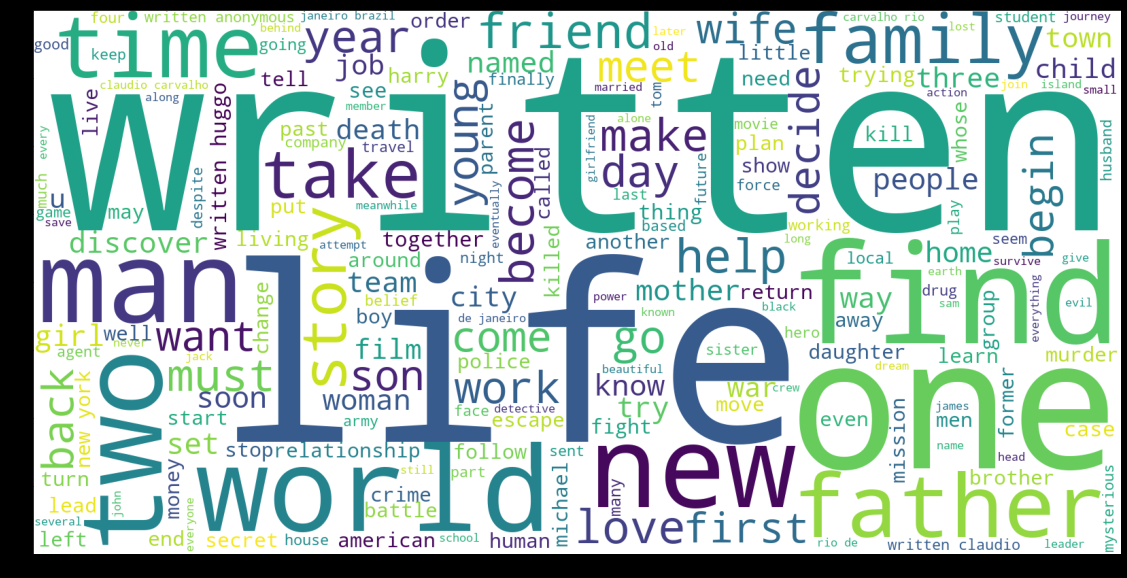

In [16]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(higher_ratings['plot_summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

### Image below shows most used words with ratings below the median

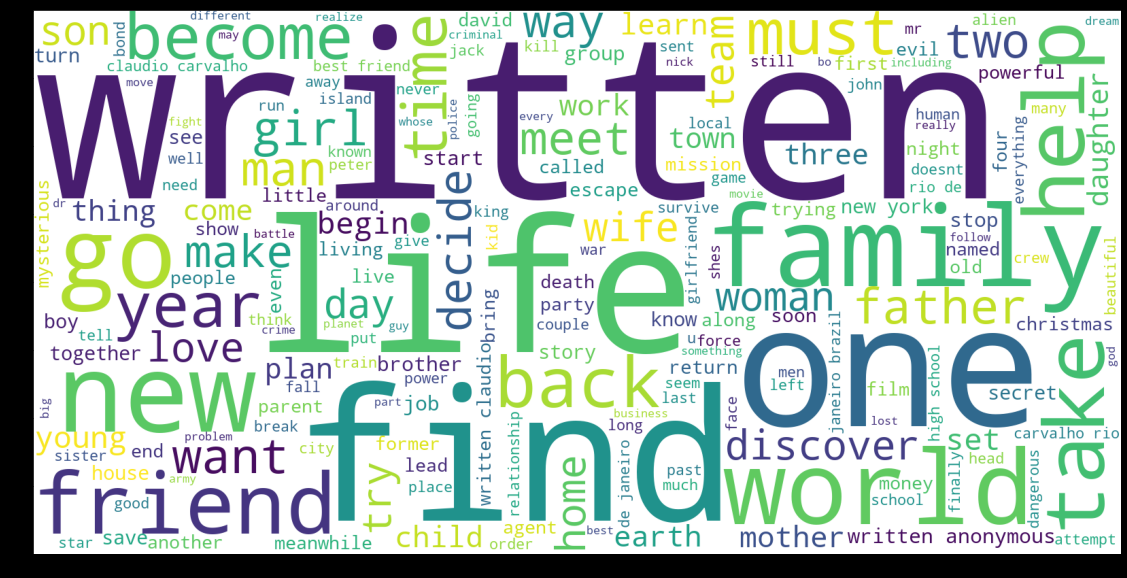

In [17]:

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(lower_ratings['plot_summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

### Image below shows most used words within the plot_synopsis column

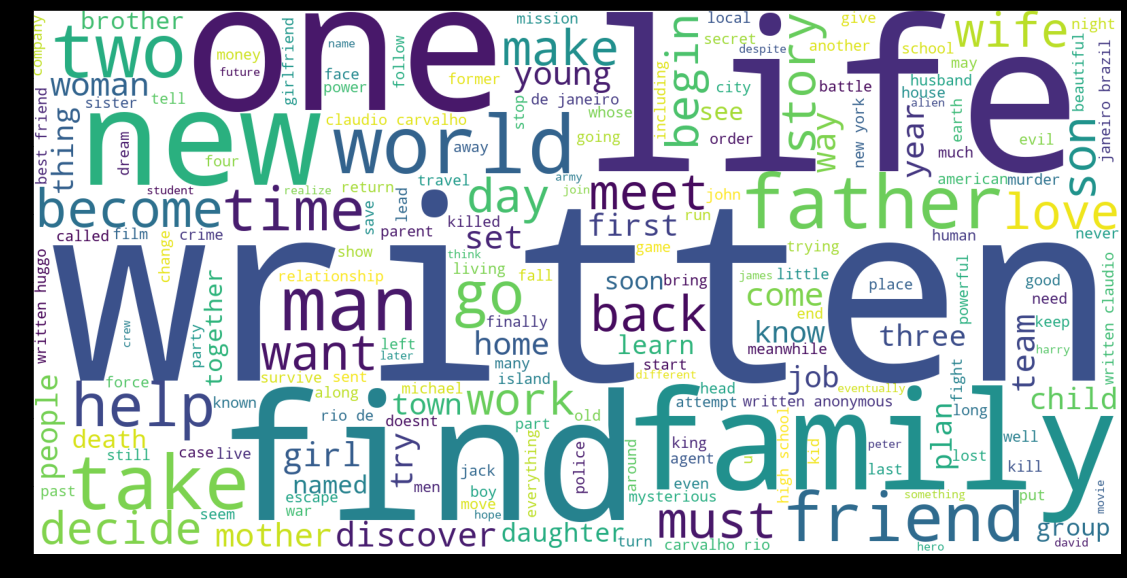

In [18]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(movieDetails['plot_summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [19]:
# the plot summary seemed to have more noun words as compared to the plot synopsis

## experimentation begins

In [94]:
# !pip install scikit-multilearn

     |████████████████████████████████| 89 kB 202 kB/s eta 0:00:011


In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer #used for multi label classification
from sklearn.model_selection import train_test_split

#machine learning algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import MultinomialNB

#accuracy scores
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

#we use the below because we will be using the logistic regression and multilabel binarizer
from sklearn.multiclass import OneVsRestClassifier # will do a classification of one class vs another(multiclass/multi label strategy)

In [21]:
movieDetails.head()
print("genre type: ",type(movieDetails["genre"][0][0]))

genre type:  <class 'str'>


In [22]:
multilabel = MultiLabelBinarizer() #need to create a multilabelbinarizer object.

In [23]:
y = multilabel.fit_transform(movieDetails["genre"])
# pd.DataFrame(y)
print("Document Term matrix of the genres")
pd.DataFrame(y,columns=multilabel.classes_) #multilabel classifiers expect such

Document Term matrix of the genres


Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0          1          0          0          0       0      0      0       0   
1          0          0          0          0       1      0      0       0   
2          0          0          0          0       1      0      0       0   
3          0          1          0          0       0      0      1       0   
4          0          0          0          0       1      0      1       0   
...      ...        ...        ...        ...     ...    ...    ...     ...   
1567       0          0          0          0       0      0      0       0   
1568       0          0          0          0       0      0      1       0   
1569       1          0          0          0       0      0      1       0   
1570       0          0          0          0       1      0      1       0   
1571       0          0          0          0       0      0      1       0   

      Fantasy  Film-Noir  ...  Horror  Music  Musical  Mystery  Romance  \
0           0          0  ...       0      0        0        0        0   
1           0          0  ...       0      0        0        0        0   
2           0          0  ...       0      0        0        0        1   
3           0          0  ...       0      0        0        0        0   
4           0          0  ...       0      0        0        0        1   
...       ...        ...  ...     ...    ...      ...      ...      ...   
1567        0          0  ...       0      0        0        0        0   
1568        0          0  ...       0      0        0        0        0   
1569        0          0  ...       0      0        0        0        0   
1570        0          0  ...       0      0        0        0        0   
1571        0          0  ...       0      0        0        0        0   

      Sci-Fi  Sport  Thriller  War  Western  
0          0      0         1    0        0  
1          0      0         0    0        0  
2          0      0         0    0        0  
3          0      0         0    0        1  
4          0      0         0    0        0  
...      ...    ...       ...  ...      ...  
1567       1      0         1    0        0  
1568       0      0         0    0        0  
1569       0      0         0    0        0  
1570       0      0         0    0        0  
1571       0      0         1    0        0  

[1572 rows x 21 columns]

In [84]:
# colors = cm.rainbow(np.linspace(0, 1, 21))
# colors

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']
[438 433  84 101 525 302 799 155 178   6  58 116  34  12 161 237 188  30
 233  25  10]


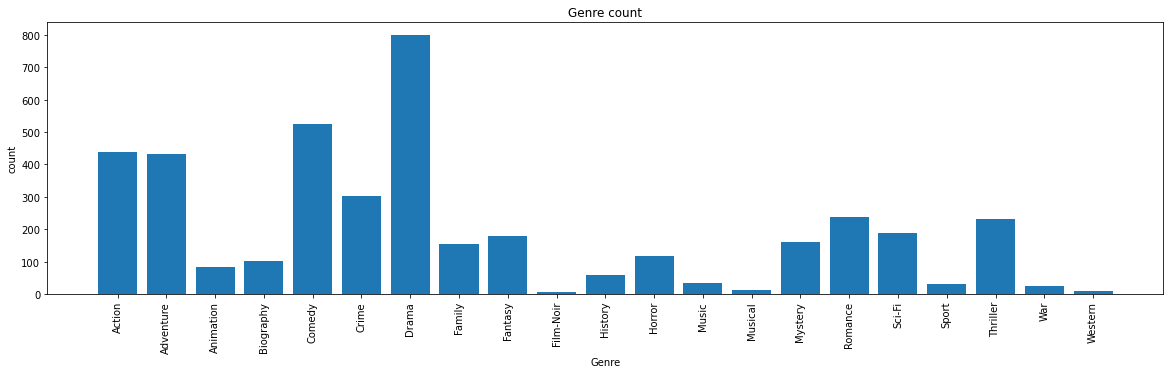

In [86]:
sum_column = y.sum(axis=0)
print(multilabel.classes_)
print (sum_column)
plt.figure(figsize=(20,5))
plt.bar(multilabel.classes_,sum_column)
plt.xticks(rotation=90)
plt.title("Genre count")
plt.xlabel("Genre")
plt.ylabel("count")
plt.show()


[438 433  84 101 525 302 799 155 178   6  58 116  34  12 161 237 188  30
 233  25  10]


In [67]:
print("No of classes: {} i.e {} ".format(len(multilabel.classes_), multilabel.classes_))

No of classes: 21 i.e ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western'] 


In [54]:
## feature engineering

## plot summary TFIDF

In [25]:
# TfidfVectorizer -> term frequency multiplication with inverse document frequency
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....
sum_tfidf = tfidf.fit_transform(movieDetails["plot_summary"]).toarray()
print("plot_summary TFIDF")
pd.DataFrame(sum_tfidf)

plot_summary TFIDF


0     1     2     3     4     5     6     7     8     9     ...  4990  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1567   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1568   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1569   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1570   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1571   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      4991  4992  4993  4994  4995  4996  4997  4998  4999  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1567   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1568   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1569   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1570   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1571   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1572 rows x 5000 columns]

## plot synopsis TFIDF

In [26]:
# TfidfVectorizer -> term frequency multiplication with inverse document frequency
tfidf = TfidfVectorizer(analyzer="word",max_features=5000, ngram_range=(1,1), stop_words="english")#if word is selected, tokenization will be done word by word, if char is selected ....
syn_tfidf = tfidf.fit_transform(movieDetails["plot_synopsis"]).toarray()
print("plot_synopsis TFIDF")
pd.DataFrame(syn_tfidf)

plot_synopsis TFIDF


0     1     2     3     4     5     6         7     8     9     ...  \
0     0.000000   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  ...   
1     0.019093   0.0   0.0   0.0   0.0   0.0   0.0  0.026325   0.0   0.0  ...   
2     0.000000   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  ...   
3     0.000000   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  ...   
4     0.000000   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  ...   
...        ...   ...   ...   ...   ...   ...   ...       ...   ...   ...  ...   
1567  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  ...   
1568  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  ...   
1569  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  ...   
1570  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  ...   
1571  0.000000   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0  ...   

      4990  4991  4992  4993  4994  4995  4996  4997  4998  4999  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
1567   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1568   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1569   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1570   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1571   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1572 rows x 5000 columns]

In [27]:
#principal component analysis
movieDetails["summary_pca"] = (movieDetails["plot_summary"].pipe(hero.clean).pipe(hero.tfidf).pipe(hero.pca))
# syn_tfidf = (movieDetails["plot_synopsis"].pipe(hero.clean).pipe(hero.tfidf))#takes too long
movieDetails

movie_id                                       plot_summary  duration  \
0      tt0105112  former cia analyst jack ryan england family va...  1h 57min   
1      tt1204975  billy michael douglas paddy robert de niro arc...  1h 45min   
2      tt0243655  setting camp firewood year 1981 last day every...  1h 37min   
3      tt0040897  fred c dobbs bob curtin luck tampico mexico 19...   2h 6min   
4      tt0126886  tracy flick running unopposed year high school...  1h 43min   
...          ...                                                ...       ...   
1567   tt0289879  evan treborn grows small town single working m...  1h 53min   
1568   tt1723811  brandon 30something man living new york unable...  1h 41min   
1569   tt5013056  evacuation allied soldier british empire franc...  1h 46min   
1570  tt0104014/  beautiful 24yearold diana bruni who happily ma...  1h 33min   
1571  tt0114142/  marriage david burgess senior executive beauti...  1h 32min   

                            genre  rating release_date  \
0              [Action, Thriller]     6.9   1992-06-05   
1                        [Comedy]     6.6   2013-11-01   
2               [Comedy, Romance]     6.7   2002-04-11   
3     [Adventure, Drama, Western]     8.3   1948-01-24   
4        [Comedy, Drama, Romance]     7.3   1999-05-07   
...                           ...     ...          ...   
1567           [Sci-Fi, Thriller]     7.7   2004-01-23   
1568                      [Drama]     7.2   2012-01-13   
1569     [Action, Drama, History]     8.1   2017-07-21   
1570              [Comedy, Drama]     5.3   1992-02-21   
1571            [Drama, Thriller]     4.0   1999-01-29   

                                          plot_synopsis  num_words  \
0     jack ryan ford working vacation london family ...        850   
1     four boy around age 10 friend brooklyn 50 nick...        521   
2                                                                0   
3     fred dobbs humphrey bogart bob curtin tim holt...        271   
4     jim mcallister matthew broderick muchadmired h...        891   
...                                                 ...        ...   
1567  year 1998 evan treborn ashton kutcher suffered...        198   
1568  brandon michael fassbender successful handsome...        526   
1569  film alternate three different period time inv...        744   
1570                                                             0   
1571                                                             0   

                                       summary_pca  
0     [-0.034378058472363276, 0.01313569510633115]  
1     [-0.03719281793021619, 0.027467665349292302]  
2     [0.006670274478331784, -0.06658369591281565]  
3       [0.02100953682428673, 0.04179085115138129]  
4      [-0.05361556203017256, 0.04275010384891505]  
...                                            ...  
1567  [-0.10623201200018167, -0.02818070535038362]  
1568  [-0.04106922818387501, -0.11441123621472711]  
1569  [0.10734038704202771, -0.029776670579348675]  
1570  [-0.04613715494178615, -0.03567444241798735]  
1571   [-0.01909212947363045, 0.05108777318956228]  

[1572 rows x 9 columns]

In [28]:
hero.scatterplot(movieDetails,"summary_pca",title="PCA plot")#add color="genre"#needs to be one dimension

In [ ]:
##select value of X (to use either plot synopsis of plot summary) -> used summary for time purposes

In [90]:
x = sum_tfidf 
# x = syn_tfidf
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#the features it has learned -_ this shows us what has been tokenized 
# print(tfidf.vocabulary_.keys() )
# print(tfidf.vocabulary_.values() )

plt.figure(figsize=(100,10))
plt.bar(tfidf.vocabulary_.keys(),tfidf.vocabulary_.values())
plt.xticks(rotation=90)
plt.title("Features count")
plt.xlabel("Feature")
plt.ylabel("How many times has it been used")
plt.show()

In [31]:
y

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [32]:
print(x.shape, y.shape)


(1572, 5000) (1572, 21)


In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)#X is feature, y is target,stratify will make sure we divide an equal ratio in train and test data sample

In [128]:
sgd = SGDClassifier()#stochastic gradient descent algorithm
lr = LogisticRegression(solver="lbfgs") #the lbfgs is the algorithm to use in the optimization problem(for multiclass problems)
svc = LinearSVC()

In [129]:
binary_rel_clf = BinaryRelevance(MultinomialNB()) #we wrap the model into an sklearn multilabel class estimator


In [130]:
#need to fit it inside for loop

# for classifier in [binary_rel_clf]:
#     clf = OneVsRestClassifier(classifier)
#     clf.fit(x_train,y_train)
#     y_pred = clf.predict(x_test)
#     print_score(y_pred,bc.classifier)
    

In [131]:
bc = binary_rel_clf.fit(x_train,y_train)

In [132]:
clf = OneVsRestClassifier(bc.classifier)
print(clf)
    

OneVsRestClassifier(estimator=MultinomialNB())


In [133]:
clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [143]:
y_pred = clf.predict(x_test)
# pd.DataFrame(y_pred,columns=multilabel.classes_)

In [135]:
print_score(y_pred,bc.classifier)

model:  MultinomialNB
Jaccard Score: 20.555555555555554
-----------------------------------------


## Accuracy functions


In [168]:
def j_score(y_true,y_pred): #to help us know how the model is performing
    jaccard = np.minimum(y_true,y_pred).sum(axis=1)/np.maximum(y_true,y_pred).sum(axis=1)
    return jaccard.mean()*100

def ham_loss(y_true,y_pred): #need to find the name(not working for some reason)
    hamn_loss = hamming_loss(y_true,y_pred)
    return hamn_loss

def a_score(y_true,y_pred): #need to find the name(not working for some reason)
    default_accuracy = accuracy_score(y_true,y_pred)
    return default_accuracy*100

def print_score(y_pred,clf):
    print("-"*50)
    print("model: ",clf.__class__.__name__)
    print("Jaccard Score: {}".format(j_score(y_test,y_pred)))
    print("Hamming Loss: {}".format(ham_loss(y_test,y_pred))) #the smaller the better
    print("accuracy score: {}".format(a_score(y_test,y_pred))) #need to find the type of this one
    print("-"*50)

## Testing different models

In [169]:
for classifier in [sgd,lr,svc]:
    clf = OneVsRestClassifier(classifier) #out of the 20 classes it will select 1 at a time and the other 19 as all other classes and will do the same for every data 
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
#     print("y_pred:{}".format(y_pred))
    print_score(y_pred,classifier)

--------------------------------------------------
model:  SGDClassifier
Jaccard Score: 34.354497354497354
Hamming Loss: 10.763416477702192
accuracy score: 7.936507936507936
--------------------------------------------------
--------------------------------------------------
model:  LogisticRegression
Jaccard Score: 20.84656084656085
Hamming Loss: 11.08087679516251
accuracy score: 4.444444444444445
--------------------------------------------------
--------------------------------------------------
model:  LinearSVC
Jaccard Score: 33.01587301587301
Hamming Loss: 10.234315948601663
accuracy score: 7.936507936507936
--------------------------------------------------


## below had the best scorring at the time

In [167]:
for classifier in [sgd]:
    clf = OneVsRestClassifier(classifier) #out of the 20 classes it will select 1 at a time and the other 19 as all other classes and will do the same for every data 
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred,classifier)

--------------------------------------------------
model:  SGDClassifier
Jaccard Score: 36.338624338624335
Hamming Loss: 10.37037037037037
accuracy score: 0.08888888888888889
--------------------------------------------------


In [38]:
# !pip install texthero

In [39]:

# help(texthero)

In [40]:
x = ["'Elite' presents three young people who have received a scholarship to study in Las Encinas, the most prestigious institute in Spain, after the collapse suffered by the public center in which they studied. However, their arrival in Las Encinas will not be easy, and the students, belonging to the upper class, will not welcome the arrival of Samuel, Nadia and Christian, who will turn upside down, without them wanting it, life of their schoolmates."]

In [41]:
xt = tfidf.transform(x)
xt
# pd.DataFrame(xt)

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [42]:
arr = clf.predict(xt)
pd.DataFrame(arr,columns=multilabel.classes_)

Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0       0          1          0          0       0      0      0       0   

   Fantasy  Film-Noir  ...  Horror  Music  Musical  Mystery  Romance  Sci-Fi  \
0        0          0  ...       0      0        0        0        0       0   

   Sport  Thriller  War  Western  
0      0         0    0        0  

[1 rows x 21 columns]

In [43]:
multilabel.inverse_transform(clf.predict(xt))

[('Adventure',)]

In [44]:
#testing with APi

In [45]:
import http.client

conn = http.client.HTTPSConnection("imdb8.p.rapidapi.com")

headers = {
    'x-rapidapi-key': "620838bae2msh191bd68cbe334d7p14b76ajsn101884661a90",
    'x-rapidapi-host': "imdb8.p.rapidapi.com"
    }

conn.request("GET", "/auto-complete?q=game%20of%20thr", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"message":"You are not subscribed to this API."}
